In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.stats import gaussian_kde


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [4]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = pd.get_dummies(dataset,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [6]:
dataset['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
x = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)


In [11]:

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7723 - loss: 0.4980 - val_accuracy: 0.7969 - val_loss: 0.4489
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7989 - loss: 0.4392 - val_accuracy: 0.7994 - val_loss: 0.4373
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4271 - val_accuracy: 0.8025 - val_loss: 0.4294
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8192 - loss: 0.4170 - val_accuracy: 0.8163 - val_loss: 0.4170
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8298 - loss: 0.4045 - val_accuracy: 0.8194 - val_loss: 0.4042
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8372 - loss: 0.3919 - val_accuracy: 0.8294 - val_loss: 0.3909
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3801 - val_accuracy: 0.8294 - val_loss: 0.3792
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.3711 - val_accu

In [16]:
model.layers[1].get_weights()

[array([[-5.16086578e-01,  3.62926126e-01, -1.89669281e-01,
         -7.44677126e-01,  6.12839937e-01,  1.46676183e-01,
         -4.67386514e-01, -5.33149123e-01, -2.18138341e-02,
         -7.79033452e-02, -3.45661551e-01],
        [ 3.89619470e-01,  1.49302602e-01, -8.46174732e-02,
         -2.39860803e-01,  2.52963394e-01, -3.03641438e-01,
          8.21774662e-01,  1.14869818e-01, -3.23272109e-01,
         -5.09946495e-02,  2.08981201e-01],
        [ 3.76383960e-01,  2.97949761e-01,  3.70766640e-01,
          3.81044000e-02,  9.36409235e-02, -1.44346327e-01,
          1.32315189e-01, -2.05012536e+00,  3.49636860e-02,
          7.02948570e-02, -3.19539189e-01],
        [ 1.68315217e-01, -7.27335095e-01,  5.71790487e-02,
          8.25718418e-02, -7.64958799e-01,  7.66980648e-01,
         -1.87104285e-01, -6.31593585e-01, -9.77962077e-01,
          9.82489645e-01, -2.90243924e-01],
        [-3.51434052e-01, -8.99640799e-01, -2.95885175e-01,
         -3.27541173e-01, -3.33613306e-01, -

In [17]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step


In [18]:
y_pred = np.where(y_log>0.5,1,0)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

In [20]:
# 0.813 0.853 0.868 0.859 0.862 0.8605

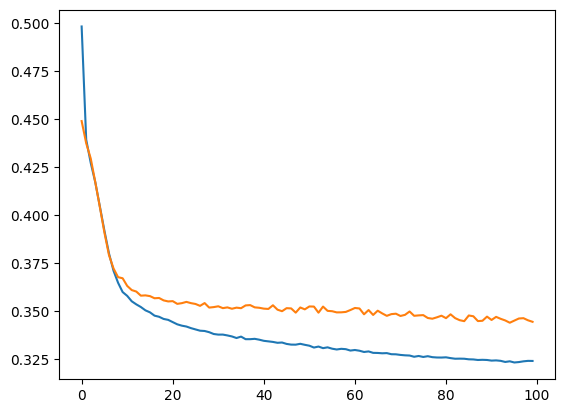

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

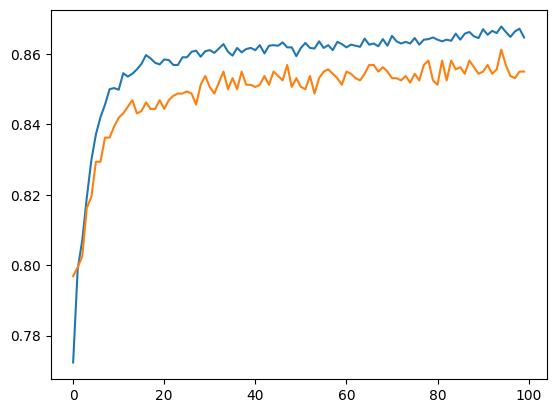

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])